# A. Single Configuration Modelling

In this part we will use the model implementation for single enzyme immobilization configuration. Several use cases are defined as follow:
1. single : same configuration as the $\alpha$-SID
2. linear : same configuration as the $\gamma$-SID
3. step   : arbitrary setting following egg-shell distribution for Enzyme A and egg-yolk dostribution for Enzyme B

In [1]:
import pyomo.environ as pyo
import pyomo.dae as dae
from main import build_reactor_model
from model.solve import solve_model_robust
import visualization.model_visualization as m_viz

decay_coef = {'kA': 0.001, 'kB': 0.0005}
def test_single_config(immobilization, decay_coef, bvp_kwargs, solver_verbose=False):
    try:
        print("Building test model...")
        test_model = build_reactor_model(immobilization=immobilization, 
                                         decay_coef=decay_coef, bvp_kwargs=bvp_kwargs)
        
        # Future implementation : If needed to do initial states 
        # initialize_model_states(model, immobilization=immobilization)
        print("Solving test model...")
        solved_model, solver_results = solve_model_robust(test_model, 
                                                          max_iter=1000, 
                                                          tol=1e-4, 
                                                          verbose=solver_verbose)
        # Print some basic results
        if solver_results.solver.termination_condition == pyo.TerminationCondition.optimal:
            print("[DONE] Optimization successful!")
            # Result print
            # print("Final S2 yield:", test_model.S_0['S2',test_model.time.last()]()/test_model.S_0['S1',test_model.time.first()]())
            # print("Final S3 yield:", test_model.S_0['S3',test_model.time.last()]()/test_model.S_0['S1',test_model.time.first()]())
            return solved_model, solver_results
        else:
            print("[FAIL] Optimization failed or did not converge optimally")
            print(f"Termination condition: {solver_results.solver.termination_condition}")

    except ImportError as e:
        print(f"Could not import model builder: {e}")
        print("This is normal if model.py is not in the same directory.")
    except Exception as e:
        print(f"Error during testing: {e}")
    

## **CASE 1: single immobilization**

In [17]:
bvp_kwargs = {}
solved_model_1, solver_result_1 = test_single_config(immobilization = 'single',
                                                     decay_coef = decay_coef,
                                                     bvp_kwargs = bvp_kwargs,
                                                     solver_verbose = True)

Building test model...
Solving test model...
Discretizing model...
Discretization completed.
Solving model with IPOPT (robust settings)...
Ipopt 3.14.19: max_iter=1000
tol=0.0001
constr_viol_tol=0.0001
acceptable_tol=0.0001
acceptable_iter=5
mu_strategy=adaptive
mu_init=1e-05
bound_relax_factor=1e-08
honor_original_bounds=no
nlp_scaling_method=gradient-based
obj_scaling_factor=1.0
print_level=5
linear_solver=mumps


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.19, running with linear solver MUMPS 5.8.1.

Number of nonzeros in equality constraint Jacobian...:   167823
Number of nonzeros in inequality constraint Jacobian.:    

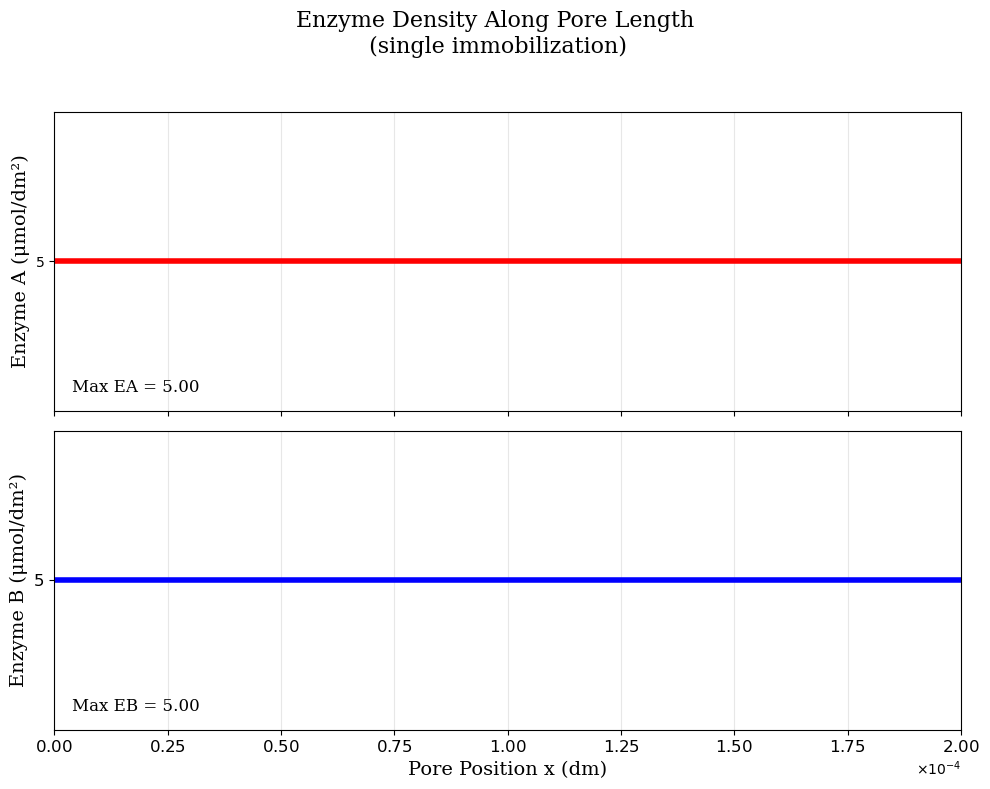

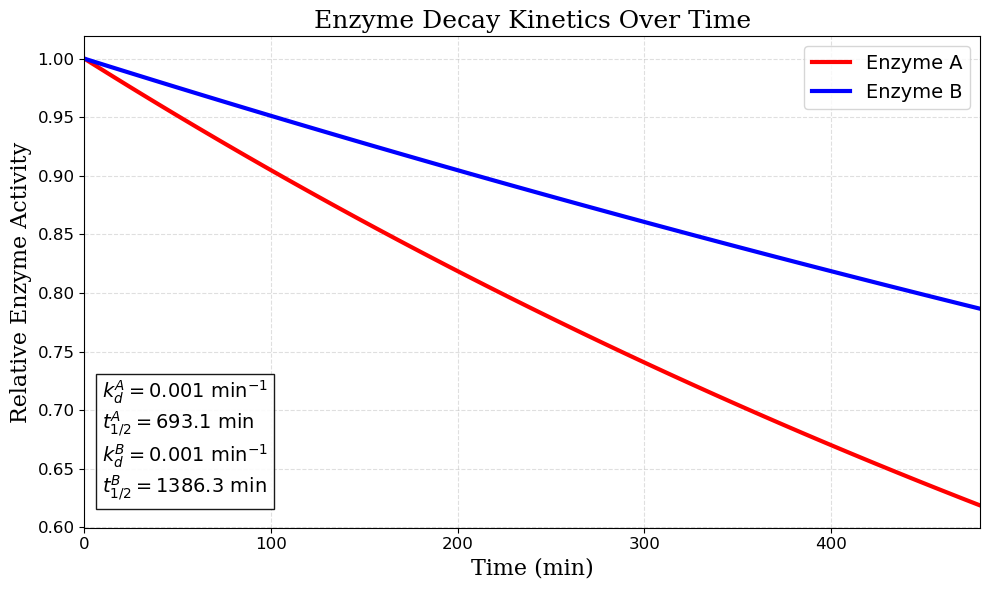

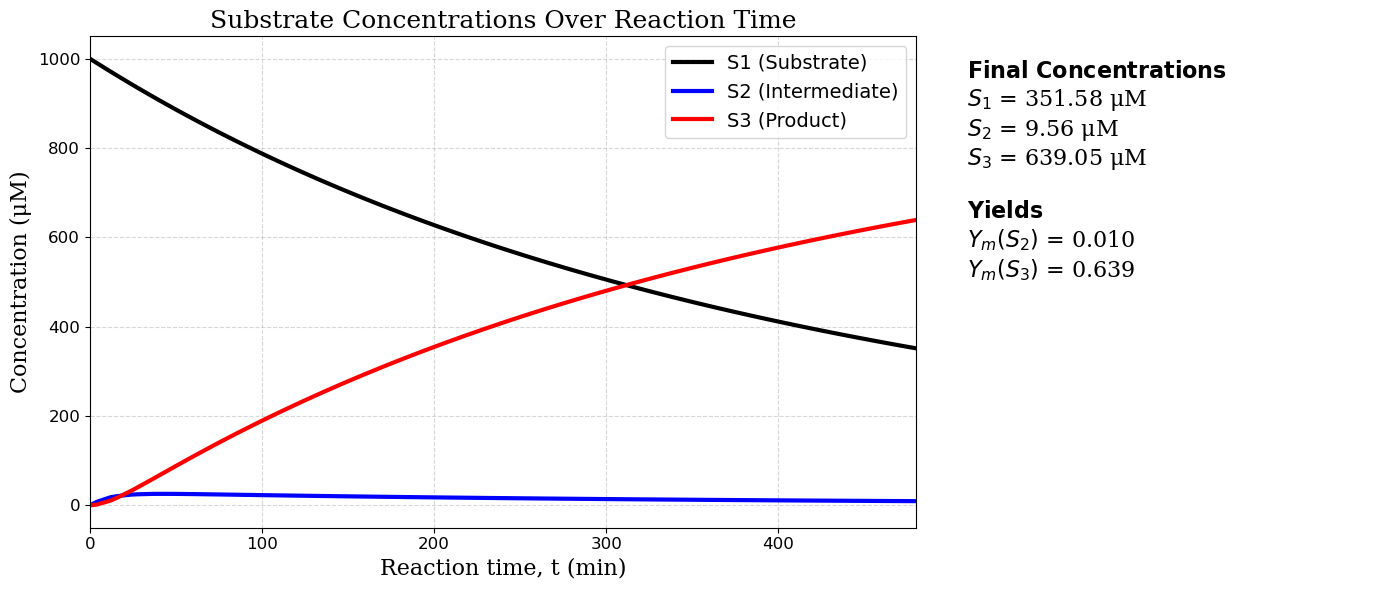

In [19]:
# Generate individual plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]  # Default size for all figures
plt.rcParams['figure.dpi'] = 100  # Resolution

fig1 = m_viz.plot_enzyme_pore_profiles(solved_model_1,immobilization='single') 
plt.show()

fig2 = m_viz.plot_enzyme_decay_profiles(solved_model_1, decay_coef)  
plt.show()

fig3 = m_viz.plot_substrate_time_profiles(solved_model_1) 
plt.show()

## **CASE 2: linear immobilization**

In [20]:
bvp_kwargs = {
    'default_fun': 'linear', 
    'adjust_Np': True,
    'enzymeA': {
        'fun': 'linear',
        'start': 1, 
        'end': 0, 
    },
    'enzymeB': {
        'fun': 'linear',
        'start': 0, 
        'end': 1,

    }
}

solved_model_2, solver_result_2 = test_single_config(immobilization = 'co-immobilization',
                                                     decay_coef = decay_coef,
                                                     bvp_kwargs = bvp_kwargs,
                                                     solver_verbose = True)

Building test model...
Pore count coefficient (simple):
  Average enzyme: 2.500000e+00
  Reference average: 5.000000e+00
  Pore count coefficient: 2.000000
Solving test model...
Discretizing model...
Discretization completed.
Solving model with IPOPT (robust settings)...
Ipopt 3.14.19: max_iter=1000
tol=0.0001
constr_viol_tol=0.0001
acceptable_tol=0.0001
acceptable_iter=5
mu_strategy=adaptive
mu_init=1e-05
bound_relax_factor=1e-08
honor_original_bounds=no
nlp_scaling_method=gradient-based
obj_scaling_factor=1.0
print_level=5
linear_solver=mumps


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.19, running with linear solver MUM

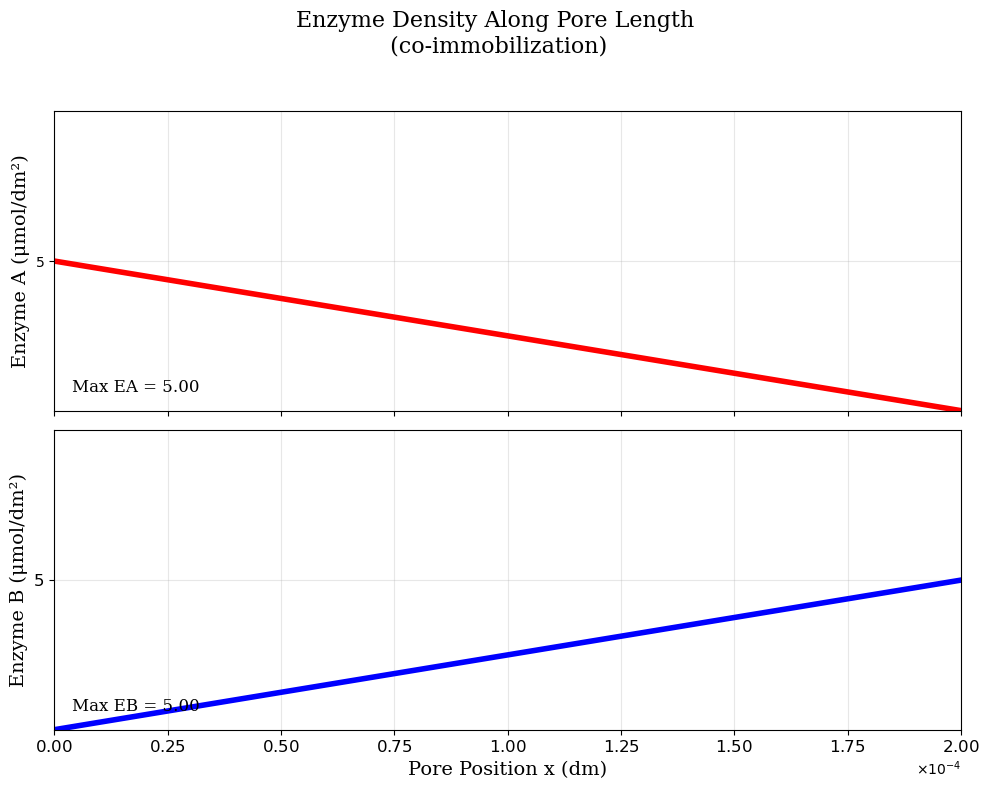

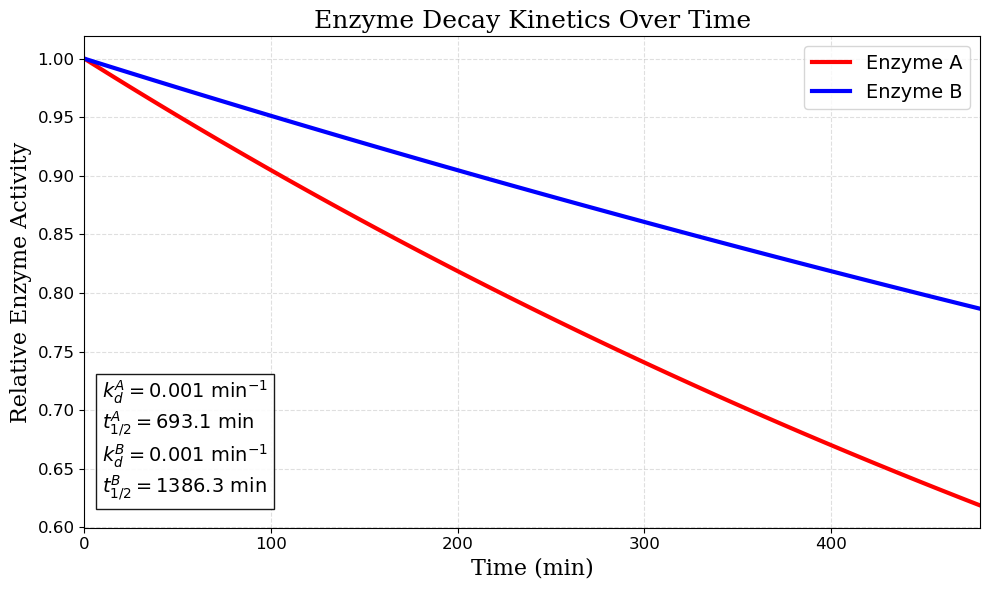

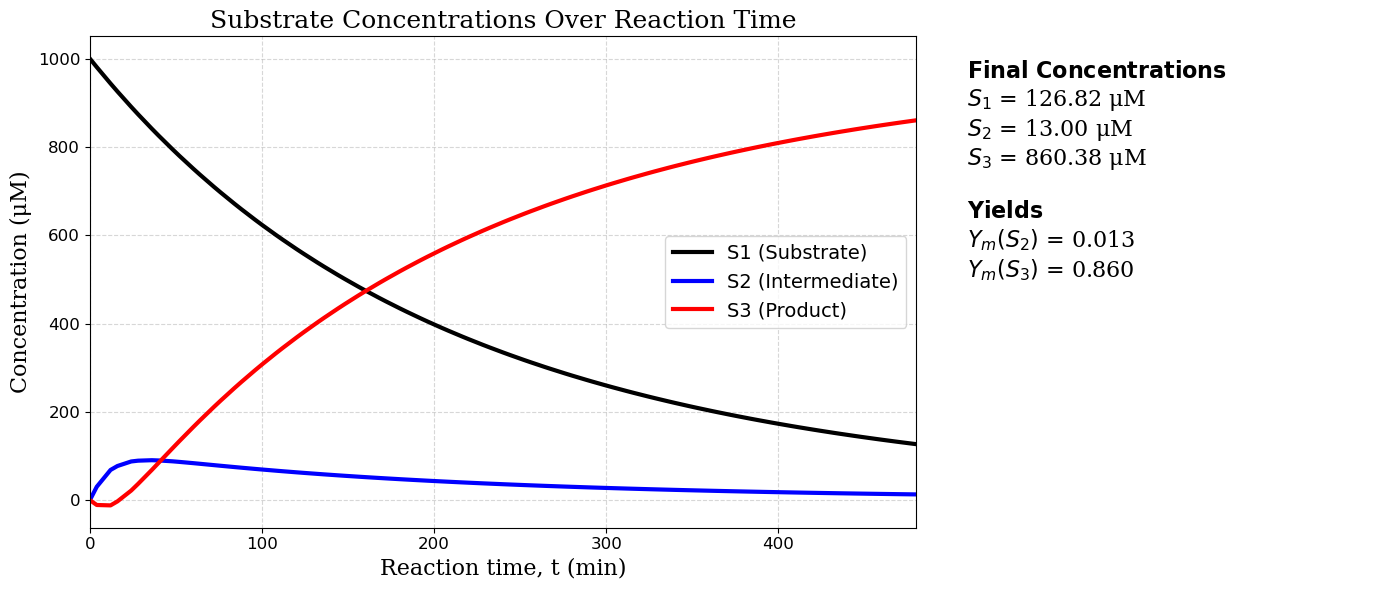

In [21]:
fig1 = m_viz.plot_enzyme_pore_profiles(solved_model_2,immobilization='co-immobilization') 
plt.show()

fig2 = m_viz.plot_enzyme_decay_profiles(solved_model_2, decay_coef)  
plt.show()

fig3 = m_viz.plot_substrate_time_profiles(solved_model_2) 
plt.show()

## **CASE 3: step immobilization**

In [24]:
bvp_kwargs = {
    'default_fun': 'linear', 
    'adjust_Np': True,
    'enzymeA': {
        'fun': 'step',
        'start': 0, 
        'end': 1,
        'x_step_up': 0.0, 
        'x_step_down': 0.5, 
        'smoothness': 50
    },
    'enzymeB': {
        'fun': 'step',
        'start': 0, 
        'end': 1,
        'x_step_up': 0.8, 
        'x_step_down': 1.0, 
        'smoothness': 100
    }
}

solved_model_3, solver_result_3 = test_single_config(immobilization = 'co-immobilization',
                                                     decay_coef = decay_coef,
                                                     bvp_kwargs = bvp_kwargs,
                                                     solver_verbose = True)

Building test model...
Pore count coefficient (simple):
  Average enzyme: 1.250000e+00
  Reference average: 5.000000e+00
  Pore count coefficient: 4.000000
Solving test model...
Discretizing model...
Discretization completed.
Solving model with IPOPT (robust settings)...
Ipopt 3.14.19: max_iter=1000
tol=0.0001
constr_viol_tol=0.0001
acceptable_tol=0.0001
acceptable_iter=5
mu_strategy=adaptive
mu_init=1e-05
bound_relax_factor=1e-08
honor_original_bounds=no
nlp_scaling_method=gradient-based
obj_scaling_factor=1.0
print_level=5
linear_solver=mumps


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.19, running with linear solver MUM

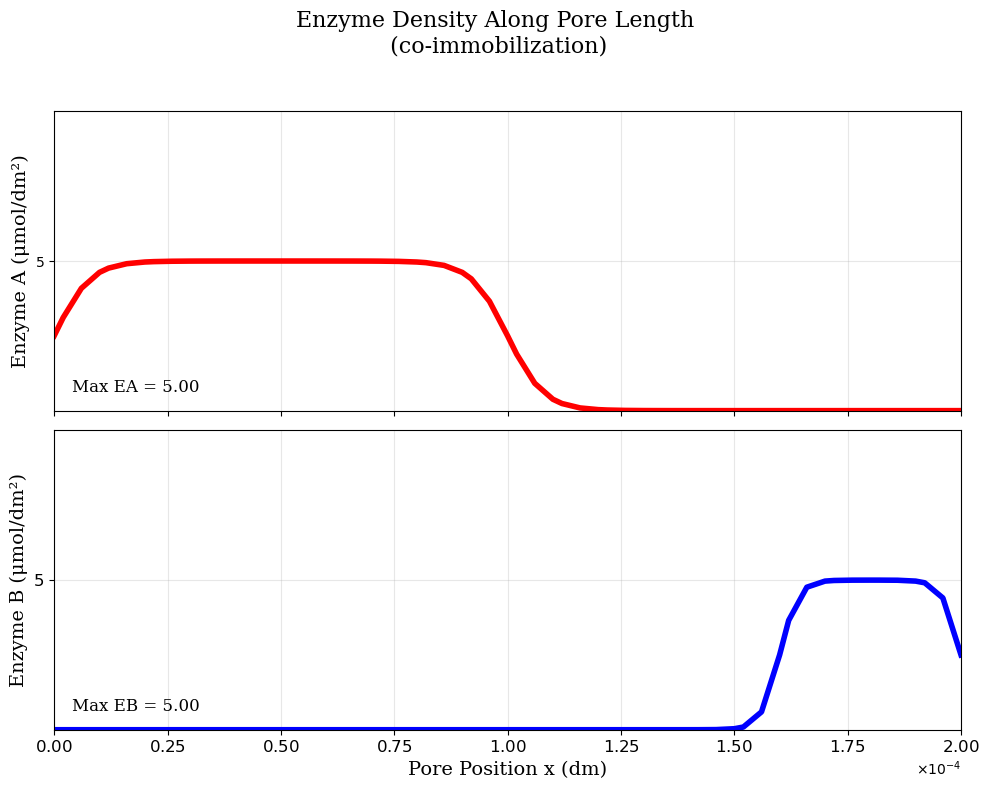

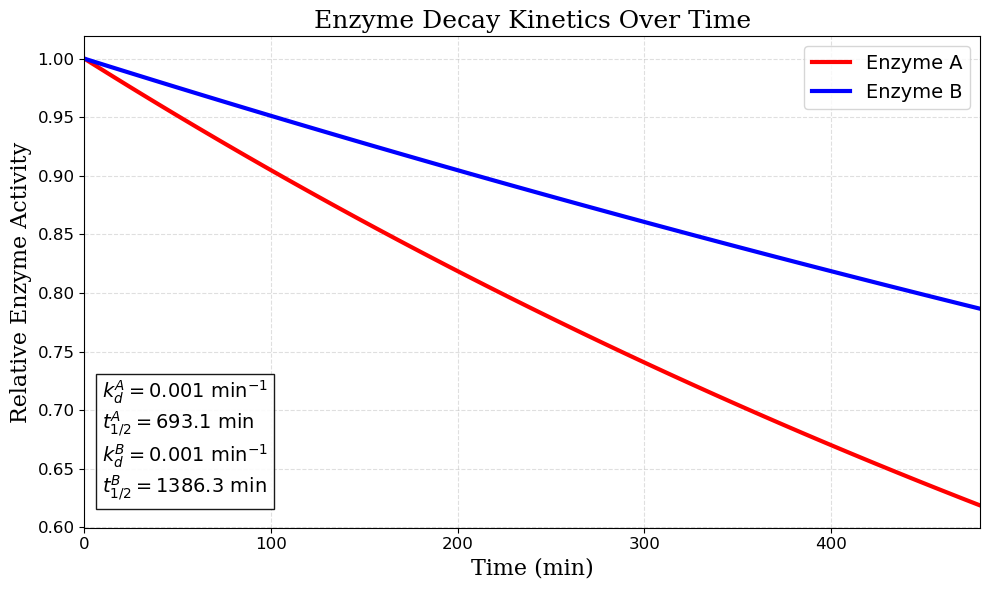

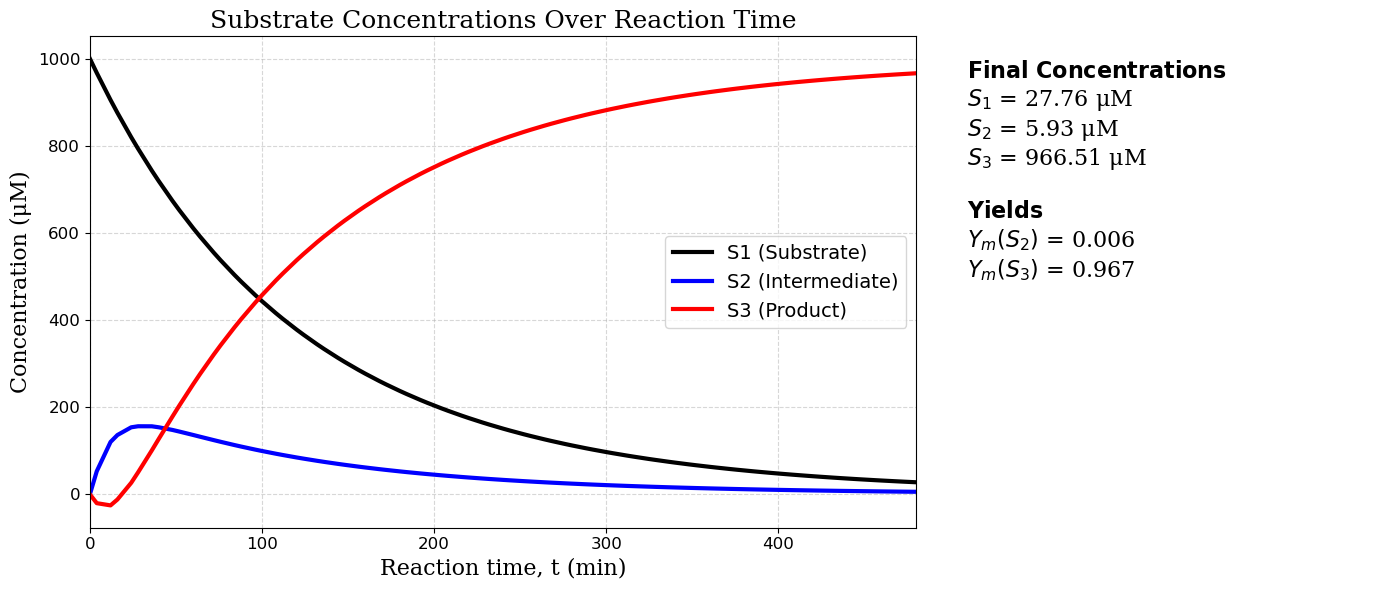

In [25]:
fig1 = m_viz.plot_enzyme_pore_profiles(solved_model_3,immobilization='co-immobilization') 
plt.show()

fig2 = m_viz.plot_enzyme_decay_profiles(solved_model_3, decay_coef)  
plt.show()

fig3 = m_viz.plot_substrate_time_profiles(solved_model_3) 
plt.show()

# B. Enzyme ratio optimization

In this part we will use the model implementation to optimize the yield of S3 based on enzyme ratio EA:EB. CASE 2 of Section A will be use to demonstrate this function.

In [2]:
import application_examples.enzyme_ratio_optimization as er_opt

profiles = {
    'linear1': {
        'default_fun': 'linear',
        'adjust_Np':False,
        'enzymeA': {'fun': 'linear', 'start': 1, 'end': 0},
        'enzymeB': {'fun': 'linear', 'start': 0, 'end': 1}
    },
    'linear2': {
        'default_fun': 'linear',
        'adjust_Np':False,
        'enzymeA': {'fun': 'linear', 'start': 0.8, 'end': 0.2},
        'enzymeB': {'fun': 'linear', 'start': 0.2, 'end': 0.8}
    }    
}

results = er_opt.compare_profiles_study(
    profiles_to_compare=profiles,
    decay_coef=decay_coef,
    total_enzyme=10,
    num_points=5
)


################################################################################
Running study for profile: linear1
################################################################################

Running configuration 1/5
EA_max: 1.0, EB_max: 9.0
DEBUG: EA value: 1.0
DEBUG: EB value: 9.0
[SUCCESS] Success: S3 yield = 0.5852

Running configuration 2/5
EA_max: 3.0, EB_max: 7.0
DEBUG: EA value: 3.0
DEBUG: EB value: 7.0
[SUCCESS] Success: S3 yield = 0.7843

Running configuration 3/5
EA_max: 5.0, EB_max: 5.0
DEBUG: EA value: 5.0
DEBUG: EB value: 5.0
[SUCCESS] Success: S3 yield = 0.8604

Running configuration 4/5
EA_max: 7.0, EB_max: 3.0
DEBUG: EA value: 7.0
DEBUG: EB value: 3.0
[SUCCESS] Success: S3 yield = 0.8982

Running configuration 5/5
EA_max: 9.0, EB_max: 1.0
DEBUG: EA value: 9.0
DEBUG: EB value: 1.0
[SUCCESS] Success: S3 yield = 0.9009

################################################################################
Running study for profile: linear2
##############################

In [3]:
results

,config_id,EA_max,EB_max,EA_ratio,EB_ratio,S2_yield,S3_yield,S2_final,S3_final,converged,solver_status,immobilization,decay_kA,decay_kB,enzyme_profile,profile_name
0,0,1.0,9.0,0.1,0.9,0.012019,0.585249,12.019332,585.249066,True,optimal,co-immobilization,0.001,0.0005,"{'default_fun': 'linear', 'adjust_Np': False, ...",linear1
1,1,3.0,7.0,0.3,0.7,0.012757,0.784320,12.757430,784.319806,True,optimal,co-immobilization,0.001,0.0005,"{'default_fun': 'linear', 'adjust_Np': False, ...",linear1
2,2,5.0,5.0,0.5,0.5,0.012999,0.860384,12.998619,860.383685,True,optimal,co-immobilization,0.001,0.0005,"{'default_fun': 'linear', 'adjust_Np': False, ...",linear1
3,3,7.0,3.0,0.7,0.3,0.015531,0.898179,15.531424,898.179317,True,optimal,co-immobilization,0.001,0.0005,"{'default_fun': 'linear', 'adjust_Np': False, ...",linear1
4,4,9.0,1.0,0.9,0.1,0.037211,0.900863,37.211068,900.862526,True,optimal,co-immobilization,0.001,0.0005,"{'default_fun': 'linear', 'adjust_Np': False, ...",linear1
5,0,1.0,9.0,0.1,0.9,0.010501,0.547976,10.500582,547.975602,True,optimal,co-immobilization,0.001,0.0005,"{'default_fun': 'linear', 'adjust_Np': False, ...",linear2
6,1,3.0,7.0,0.3,0.7,0.012154,0.748631,12.154336,748.631112,True,optimal,co-immobilization,0.001,0.0005,"{'default_fun': 'linear', 'adjust_Np': False, ...",linear2
7,2,5.0,5.0,0.5,0.5,0.013239,0.829872,13.239411,829.872104,True,optimal,co-immobilization,0.001,0.0005,"{'default_fun': 'linear', 'adjust_Np': False, ...",linear2
8,3,7.0,3.0,0.7,0.3,0.016795,0.871864,16.795464,871.863843,True,optimal,co-immobilization,0.001,0.0005,"{'default_fun': 'linear', 'adjust_Np': False, ...",linear2
9,4,9.0,1.0,0.9,0.1,0.042033,0.875207,42.032801,875.207106,True,optimal,co-immobilization,0.001,0.0005,"{'default_fun': 'linear', 'adjust_Np': False, ...",linear2
